# Credit Card Fraud Detection Using Deep Learning

### Importing Libraries and Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')
import keras

In [3]:
random.seed(2)

In [4]:
dataset = pd.read_csv('creditcard.csv')

### Data Exploration

In [5]:
# Data Exploration
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### data pre-processing

In [7]:

from sklearn.preprocessing import StandardScaler
dataset['NormalizedAmount'] = StandardScaler().fit_transform(dataset['Amount'].values.reshape(-1,1))
dataset = dataset.drop(columns='Amount')

In [8]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,NormalizedAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [9]:
dataset = dataset.drop(columns='Time')

In [10]:
#Splitting The Data

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(dataset.drop(columns='Class'),dataset['Class'],test_size=0.3,random_state=0)

In [11]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,NormalizedAmount
161145,-0.132066,0.107044,-0.650588,-0.996032,1.814333,1.740740,0.496852,0.633016,0.017181,-0.362707,...,-0.062612,-0.062489,0.005292,0.251519,-2.466810,-0.889690,0.337462,0.306395,0.074817,-0.161761
204520,2.125994,0.014207,-1.514760,0.115021,0.598510,-0.333235,0.199289,-0.264353,0.384111,0.028747,...,-0.086076,-0.329368,-0.788150,0.267730,0.066122,-0.135785,0.203841,-0.068267,-0.057678,-0.345313
182659,-0.086694,0.166240,1.573127,0.687266,0.222359,1.102606,1.575093,-1.098608,0.763887,1.404677,...,0.052960,0.015324,1.063663,-0.410841,0.722723,-0.171733,-0.613543,-1.201571,-1.139931,0.326845
25117,1.352339,-0.534984,0.555143,-0.629355,-1.144170,-0.852967,-0.642128,-0.032659,-0.654482,0.619206,...,-0.066712,-0.014814,-0.180379,0.178112,0.347720,0.151810,-0.404361,0.013746,0.016152,-0.329401
227642,-1.526760,0.647782,0.615391,-0.561114,0.836950,-0.514251,0.984325,-0.097430,-0.062634,-1.033567,...,-0.073333,-0.221533,-0.393158,-0.214990,0.588447,0.679496,0.518434,0.065022,0.147294,0.006398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211543,-1.321976,1.138686,-0.940861,0.154160,0.109802,-0.538822,0.490058,0.513762,-0.493834,-0.446486,...,-0.436962,-0.012778,-0.237503,0.008713,-0.767844,-0.397162,0.316379,-0.463125,-0.010589,-0.153765
86293,-0.627810,0.918729,1.478453,0.213171,0.933695,1.261486,0.504752,0.404286,-0.939740,-0.853181,...,0.088281,-0.051356,-0.004245,0.090535,-0.964599,-0.522294,0.296733,0.145939,0.110400,-0.253317
122579,1.512602,-0.949435,-0.219062,-1.638850,-0.856348,-0.465996,-0.669193,-0.135566,-2.284345,1.611424,...,-0.279028,-0.558803,-1.377240,0.080444,-0.579511,0.297851,-0.495367,-0.001415,0.003665,-0.213696
152315,1.798863,-1.699791,-0.142182,-0.619533,-1.570248,0.083268,-1.501980,0.176287,1.755507,0.470972,...,0.146098,0.181914,0.351358,0.115638,-0.566188,-0.596200,-0.295152,-0.033616,-0.032471,0.331683


In [12]:
y_train

161145    0
204520    0
182659    0
25117     0
227642    0
         ..
211543    0
86293     0
122579    0
152315    0
117952    0
Name: Class, Length: 199364, dtype: int64

In [13]:
X_train.shape

(199364, 29)

In [14]:
y_train.shape

(199364,)

In [15]:
X_test.shape

(85443, 29)

In [16]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [17]:
y_train = np.array(y_train)
y_test = np.array(y_test)

### Modelling


In [18]:
#Deep Nerural Network

from keras.models import Sequential
from keras.layers import Dense,Dropout

In [20]:
model = Sequential([
    Dense(units=16,input_dim=29,activation='relu'),
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(20,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_5 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
______________________________________________________

In [22]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
13291/13291 [==============================] - 47s 4ms/step - loss: 0.0078 - accuracy: 0.9990
Epoch 2/5
13291/13291 [==============================] - 44s 3ms/step - loss: 0.0039 - accuracy: 0.9993
Epoch 3/5
13291/13291 [==============================] - 46s 3ms/step - loss: 0.0035 - accuracy: 0.9993
Epoch 4/5
13291/13291 [==============================] - 45s 3ms/step - loss: 0.0036 - accuracy: 0.9993
Epoch 5/5
13291/13291 [==============================] - 50s 4ms/step - loss: 0.0035 - accuracy: 0.9993


In [23]:
score = model.evaluate(X_test,y_test)






2671/2671 [==============================] - 4s 1ms/step - loss: 0.0036 - accuracy: 0.9994


In [24]:
print(score)

[0.003641576739028096, 0.9993562698364258]


In [26]:
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred.round())

In [29]:
cm

array([[85280,    16],
       [   39,   108]], dtype=int64)

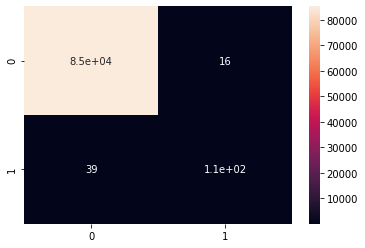

In [30]:
sns.heatmap(cm,annot=True)

In [31]:
y_pred = model.predict(dataset.drop(columns='Class'))
y_expected = pd.DataFrame(dataset['Class'])

In [33]:
cm = confusion_matrix(y_expected,y_pred.round())

In [34]:
print(cm)

[[284267     48]
 [   127    365]]


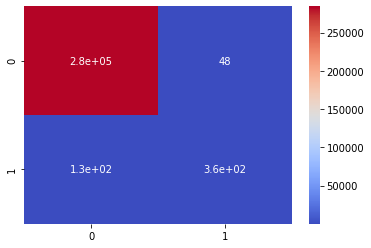

In [35]:
sns.heatmap(cm,annot=True,cmap='coolwarm')

###  Thankyou